# Informe Práctica 5: Regresión Logística
**Andrea Pardo Gispert**  
**04/02/2025**


### **Objetivos del Proyecto**

El objetivo de este analisis es desarrollar un modelo de Regresion logistica para predecir la probabilidad de incumplimiento de un prestamo. Los pasos a seguir son:

1. Cargar y explorar el conjunto de datos:
    - Cargar el conjunto de datos
    - Realizar una exploracion inicial del dataset

2. Preparacion de datos:
    - Convertir variables categoricas en dummies
    - Escalar caracteristicas numericas
    - Dividir el conjunto de datos en un conjunto de entrenamiento y otro de prueba

3. Construcción del modelo:
    - Entrenar un modelo de regresión logistica utilizando sklearn
    - Obtener coeficientes
      
4. Aplicación del modelo:
   - Predecir la probabilidad de incumplimiento
   - Generar predicciones en el conjunto de prueba
     
5. Evalueacion e interpretación:
   - Analizar metricas como precision, sensibilidad y especificidad

6. Comparar con Statsmodels:
   - Comparar el modelo de sklearn con statsmodels
    

## **0. Descripción del conjunto de datos**

Este conjunto de datos contiene información financiera de clientes, con las siguientes variables:

- balance: Saldo de la cuenta bancaria.
- income: Ingreso anual del cliente.
- student: Indica si el cliente es estudiante (Yes/No).
- default: Variable objetivo (1 = incumplimiento del préstamo, 0 = no incumplimiento).

Importamos las librerías necesarias:  

In [4]:
# Importamos las librerias
# Las Esenciales
import pandas as pd
import numpy as np

# Para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Para la division de los datos y escalado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Para la regresion logistica y metricas de evaluacion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Para las estadisticas avanzadas
import statsmodels.api as sm


In [5]:
#pip install --upgrade openpyxl
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


## **1. Cargar y explorar el conjunto de datos**

Para conocer mejor el conjunto de datos, realizaremos:  
- Una visualización de las primeras filas con `.head()`.  
- Un análisis de la estructura con `.info()` y `.describe()`.  
- La detección de valores nulos y tipos de datos.  
- La distribución de la variable objetivo (`default`).  
- Un análisis gráfico de la relación entre las características.
- La detección de filas duplicadas y el numero de valores únicos por columna.

Primeras filas del dataset:


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879



 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB

 Resumen estadístico:


,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495



 Valores nulos por columna:
Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

 Distribución de la variable objetivo 'default':
default
No     9667
Yes     333
Name: count, dtype: int64


C:\Users\Andrea\AppData\Local\Temp\ipykernel_23460\1673858924.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=data, palette='Blues')


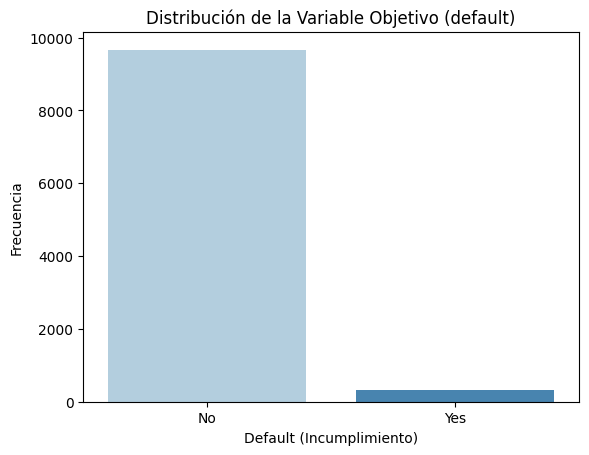

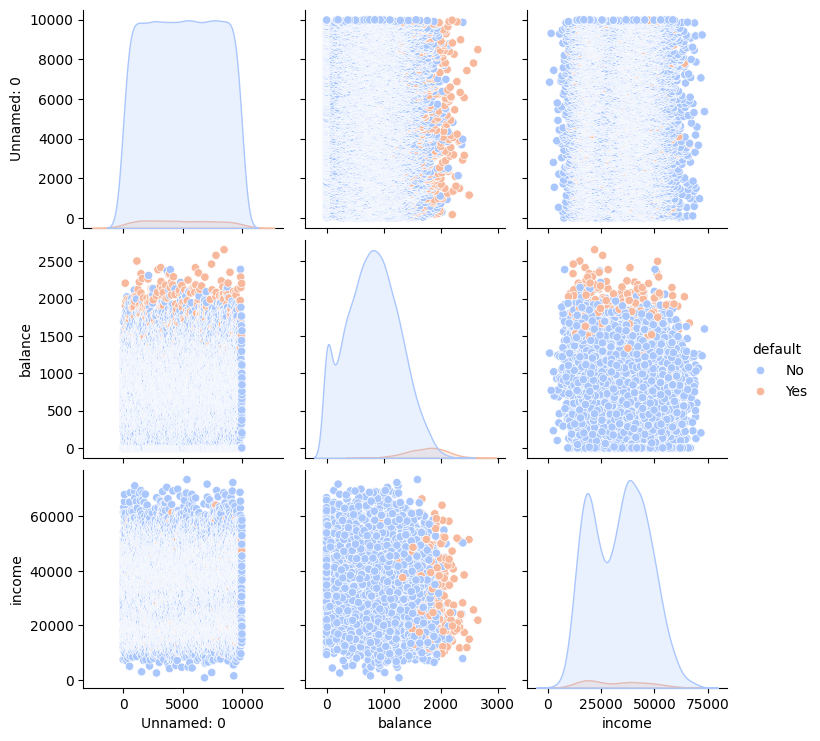


 Filas duplicadas:
0

 Valores únicos por columna:
Unnamed: 0: [    1     2     3 ...  9998  9999 10000]
default: ['No' 'Yes']
student: ['No' 'Yes']
balance: [ 729.52649521  817.18040656 1073.54916401 ...  845.41198922 1569.00905338
  200.92218263]
income: [44361.62507427 12106.13470031 31767.1389474  ... 58636.15698381
 36669.11236458 16862.95232094]


In [20]:
# Descarga de datos
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Default.xlsx"
data = pd.read_excel(url)

# Exploracion inicial
#Primeras filas
print("Primeras filas del dataset:")
display(data.head())

#Informacion general
print("\n Información del dataset:")
data.info()

#Resumen estadístico de las variables numéricas
print("\n Resumen estadístico:")
display(data.describe())

#Verificar valores nulos
print("\n Valores nulos por columna:")
print(data.isnull().sum())

#Distribusión de la variable objetivo
print("\n Distribución de la variable objetivo 'default':")
print(data['default'].value_counts())

# Visualización de la distribución de la variable objetivo
sns.countplot(x='default', data=data, palette='Blues')
plt.title("Distribución de la Variable Objetivo (default)")
plt.xlabel("Default (Incumplimiento)")
plt.ylabel("Frecuencia")
plt.show()

# Visualización de la relación entre balance, income y default
sns.pairplot(data, hue='default', diag_kind='kde', palette='coolwarm')
plt.show()

# Revision de valores unicos y duplicados
# Filas duplicadas
print("\n Filas duplicadas:")
print(data.duplicated().sum()) 

# Numero de valores unicos por columna
print("\n Valores únicos por columna:")
for column in data.columns:
    print(f"{column}: {data[column].unique()}") 


- No se han encontrado valores nulos en el dataset.
- La variable default está desequilibrada, solo un pequeño porcentaje de clientes incumple el préstamo.
- Podemos ver una posible relacion entre balance y el incumplimiento de pago.

## **2. Preparacion de datos**

- Convertiremos la variable categórica student en variables dummy (student_yes).
- Normalizaremos las variables balance e income usando StandardScaler.
- Dividiremos los datos en 80% entrenamiento y 20% prueba.
   

In [26]:
# Convertir variable categórica 'student' en dummy
data = pd.get_dummies(data, columns=['student'], drop_first=True)

# Separar variables predictoras y objetivo
X = data[['balance', 'income', 'student_Yes']]
y = data['default'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convertir 'Yes/No' a 1/0

# Escalar las características numéricas
scaler = StandardScaler()
X.loc[:, ['balance', 'income']] = scaler.fit_transform(X[['balance', 'income']])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **3. Construccion del modelo de regresion logística**

- Utilizaré **Regresión Logística** para modelar la probabilidad de incumplimiento ('default')
- ### **Coeficientes del modelo (sklearn)**
- **Intercept** 'log_model.intercept_'
- **Coeficientes** 'log_model.coef_'
- Se observa que la variable 'balance' tiene el mayor peso en la predicción del incumplimiento de pago.

In [28]:
# Entrenar el modelo
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Coeficientes del modelo
print("Intercept:", log_model.intercept_)
print("Coeficientes:", log_model.coef_)


Intercept: [-6.0974908]
Coeficientes: [[ 2.79475471  0.10610986 -0.44205046]]


- Intercept de -6.0974908, es la probabilidad inicial, cuando todas las variables predictoras son 0. 
Este valor negativo nos está indicando, sin tener en cuenta el resto de variables, que la probabilidad inciial de incumplir el préstamo es muy baja (nos da un valor muy pequeño teniendo en cuenta la fórmula general de la regresión logística).
- Los valores de los coeficientes, si asumimos que son **Balance**, **Student** e **Income**, podemos decir que:
- Por cada unidad adicional en **Balance**, la probabilidad de incumplimiento aumenta, lo que nos sugiere que si el balance es más alto el riesgo de incumplimiento también lo es.
- Ser **Estudiante** aumneta ligeramente la probabilidad del incmplimiento ( aunque es menos relevante que el balance).
- Y en este caso, ocurre lo contrario a lo que ocurre con el balance. Si aumenta el **Income**, la probabilidad de incumplimiento disminuye.

## **4. Aplicacion del modelo**

 **Matriz de confusión**

Se va a generar la matriz de confusión, que nos indicará cuántas veces se acertó y se equivocó el modelo en la clasificación de clientes.

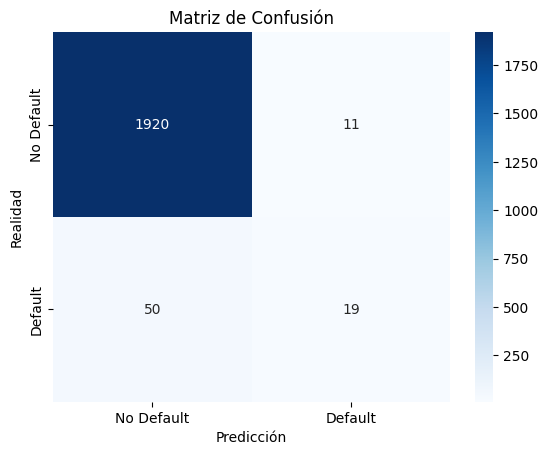

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.63      0.28      0.38        69

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000



In [31]:
# Probabilidades y predicciones
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
y_pred = log_model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

# Informe de clasificación
print(classification_report(y_test, y_pred))


Clase 0 (default = NO):
- **Precisión**: De todas las predicciones que el modelo ha hecho como NO INCUMPLE, el 97% son correctas.
- **Recall**: De todos los clientes que realmente NO INCUMPLEN, el modelo los ha identificado correctamente al 99%.
- **F1-score**: Aquí tenemos el balance entre precisión y recall, al ser tan alto nos está indicando que el modelo es MUY BUENO clasificando correctamentea quien NO incumple.

Clase 1 (default = YES):
- **Precisión**: De todas las predicciones que el modelo ha hecho como SI INCUMPLE, solo el 63% son correctas.
- **Recall**: De todos los clientes que realmente INCUMPLEN, el modelo los ha identificado correctamente solo al 28%. Nos indica que el modelo tiene problemas para detectar a los clientes que incumplen.
- **F1-scrore**: Es bajo porque ni la precisión ni el recall son buenos para esta clase.

#### **Metricas generales**

- **Acuracy** (97%): Esta es la proporción de predicciones correctas. Nos da un valor muy alto, pero despues de analizar las metricas anteriores sabemos que, no refleja una realidad porque los datos están desequilibrados. El moldelo puede clasificar a casi todos como 0 y aún así obtener un valor alto de Acuracy.
- **Macro avg**: Es el promediode simple las métricas entre las dos clases. **Precisión (80%)**, **Recall (63%)** y **F1-score (68%)** nos muestran un rendimiento medio, sin tener en cuenta que las clases están desequilibradas.
- **Weighted avg**: Es el promedio ponderado de las métricas pero aquí consideramos el número de observaciones en cada clase. Las métricas que obtenemos son similares a la de la clase 0 porque es la que domina el conjunto. Precisión (96%), Recall (97%), F1-score (96%), parece un buen rendimiento general, pero no es cierto porque está desequilibrado.

## **5. Evaluacion del modelo**

- **Precisión general:** `(TP + TN) / Total`.  
- **Sensibilidad (Recall):** `TP / (TP + FN)`.  
- **Especificidad:** `TN / (TN + FP)`.


In [33]:
# Métricas específicas
# Extraemos los valores de la matriz de confusion
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Precisión: {accuracy:.2f}")
print(f"Sensibilidad: {sensitivity:.2f}")
print(f"Especificidad: {specificity:.2f}")


Precisión: 0.97
Sensibilidad: 0.28
Especificidad: 0.99


#### **Métricas Clave**  
| **Métrica**        | **Valor** |
|--------------------|-----------|
| **Precisión**      | 0.97      |
| **Sensibilidad**   | 0.28      |
| **Especificidad**  | 0.99      |

- **Precisión (97%)**: La precisión mide qué tan bien predice el modelo. Con un resultado del 97% de aciertos del modelo podríamos decir que tiene una alta precisión, pero el problema de los datos desequilibrados puede darnos un valor engañoso de la precisión.
- **Sensibilidad (28%)**: La sensibilidad midel la capacidad del modelo para identificar correctamente a los clientes que **incumplen** el prestamo (clase 1). En este caso solo el 28% de los clientes que realmente incumplen son identificados correctamente. Esto nos dice, **una vez más** que el modelo tiene problemas para detectar a quien incumple el prestamo. Esto es una mala señal para nosotros si queremos usar este modelos para evaluar el riesgo crediticio, es importante para prevenir pérdidas.
- **Especificidad (99%)**: Esto mide la capacidad del modelo para identificar correctamente a los clientes que **no incumplen** (clase 0). En este caso el 99% de los clientes que no incumplen son correctamente clasificados. El modelo es excelente para predecir la clase mayoritaria (default = NO).
- El modelo tiene un sesgo hacia la clase mayoritaria . Detecta bien a los clientes que no incumplen, pero falla al identificar quienes incumplen. Deberíamos mejorar la sensibilidad, ya que quien incumple el credito son el foco principal para este problema.

In [35]:
# Agtregar la constante a X_train al conjunto de entrenamiento
X_train_sm = sm.add_constant (X_train) 

# Convertir la columna 'student_Yes' a un tipo numerico
X_train_sm['student_Yes'] = X_train_sm['student_Yes'].astype(int)

In [37]:
# Verificar los tipos de datos y valores nulos 
print(X_train_sm.dtypes)
print(y_train.dtypes)
print(X_train_sm.isnull().sum())
print(y_train.isnull().sum())
print(y_train.shape)
print(X_train_sm.shape)

const          float64
balance        float64
income         float64
student_Yes      int32
dtype: object
int64
const          0
balance        0
income         0
student_Yes    0
dtype: int64
0
(8000,)
(8000, 4)


- Los datos están listos para ser usados, no tenemos valores nulos y los tipos de datos son correctos.
- Hemos transformado correctamente las variables categóricas, la columna student_Yes se ha convertido a tipo numérico (int32), así el modelo lo interpretará como una variable categórica binaria.
- El modelo tendrá 4 parámetros para ajustar, 1 intercepto (const) y 3 coeficientes (balance, income, student_Yes).
- Así evitamos errores durante el entrenamiento y optimizamos el modelo.

## **6. Comparacion con Statsmodels**

Ahora vamos a ajustar el mismo modelo pero usando 'statsmodels' para obtener una interpretación más detallada de los coeficientes.
  

In [39]:
# Ajuste del modelo usando statsmodels
log_model_sm = sm.Logit(y_train, X_train_sm).fit()
print(log_model_sm.summary())

# Predicciones con Statsmodels
X_test_sm = sm.add_constant(X_test)

# Convertimos la columna 'student_Yes' de X_test_sm
X_test_sm['student_Yes'] = X_test_sm['student_Yes'].astype(int)

# Realizamos predicciones
y_pred_sm = log_model_sm.predict(X_test_sm)

# Convertimos probabilidades a predicciones binarias
y_pred_sm_binary = [1 if prob > 0.5 else 0 for prob in y_pred_sm]

# Comparamos con sklearn
print(classification_report(y_test, y_pred_sm_binary))


Optimization terminated successfully.
         Current function value: 0.076032
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Feb 2025   Pseudo R-squ.:                  0.4757
Time:                        11:34:13   Log-Likelihood:                -608.26
converged:                       True   LL-Null:                       -1160.2
Covariance Type:            nonrobust   LLR p-value:                5.404e-239
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.1595      0.228    -27.042      0.000      -6.606      -5.713
balance         2.8433   

#### **Métricas generales del modelo:**

- El modelo clasifica muy bien los casos de no default debido al gran desbalance de datos (la clase 0 domina). Sin embargo, tiene problemas para identificar correctamente los casos de default (recall bajo).

- El saldo (balance) tiene un gran impacto en la probabilidad de default.
- Los ingresos (income) no tienen un impacto significativo.
- Ser estudiante reduce ligeramente la probabilidad de default.

- Podríamos usar técnicas para lidiar con el desbalance de clases (submuestreo, sobremuestreo, o ajustar el umbral de decisión).

- Hay una advertencia que nos indica que un pequeño porcentaje de las observaciones puede ser perfectamente clasificado por el modelo, lo que puede causar problemas al estimar los parámetros (sobreajuste).

## **7. Conclusiones**

1. **El saldo de la cuenta bancaria (`balance`) es el predictor más fuerte del incumplimiento de pago**.  
   - Los clientes con un saldo más alto tienen menos probabilidad de incumplimiento.  
   - Esta variable es altamente significativa en el modelo. 

2. **El ingreso (`income`) no parece ser un factor determinante** en la predicción del incumplimiento.  
   - Su coeficiente es pequeño y tiene un alto p-valor en `statsmodels`.

3. **El modelo tiene alta precisión pero baja sensibilidad**.  
   - Detecta bien a los clientes que **no incumplen**, pero falla en algunos casos de incumplimiento.  
   - Se podrían probar técnicas para mejorar la detección de incumplimientos.  

4. **Comparación sklearn vs. statsmodels**  
   - `sklearn` permite construir el modelo y predecir rápidamente.  
   - `statsmodels` proporciona una mejor interpretación de los coeficientes y significancia estadística.  

5. **Posibles mejoras**  
   - Explorar otros modelos como árboles de decisión o random forests.  
   - Ajustar los umbrales de decisión para mejorar la sensibilidad del modelo.  
   - Probar diferentes enfoques para manejar el desbalanceo de la variable objetivo. 